### Welcome to the data analysis project
### I hope to introduce you to insight to help you decide and serve your business



# Project: No_show_appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Analytical questions">Analytical questions</a></li>
<li><a href="#conclusions">Conclusions</a></li>

</ul>

<a id='intro'></a>
# Introduction

## Dataset Description 

### These are data for patients who have booked with a doctor

### The data contains :
    
    [AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship	                                                    Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show]
    
    





# Question(s) for Analysis
 

   # Is the greater percentage of non-attendance male or female?  
   
   ##  1- is the ratio between males or females and No show                                         appointments?   

   ## 2- is the ratio between Age and Scholarship?

   ##  3- How many patients attended?

   ##  4- How many patients not attended?

   ##  5- Is there a greater percentage of non-attendance among men or                    women?

   ##  6- Is there a relationship between age and non-attendance?



In [1]:
%matplotlib inline
import seaborn as sns
#import missingno as msno

In [2]:
import numpy as np
import pandas as pd 
import matplotlib as mp
from sklearn.preprocessing import StandardScaler
import re


%matplotlib inline




## Let's start the journey to reach some insight into the business​: 


In [22]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade seaborn==0.9.0

    100% |████████████████████████████████| 215kB 8.4MB/s ta 0:00:01
  Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

## The frist step

# Load Data

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
def no_show_pd(show):
    return show[(show.df=="yes")]
df=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")


# Gathering Data

In [21]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [18]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


###  *Note 
#### no missing data

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [23]:
df.shape

(110527, 14)

In [24]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [25]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [26]:
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [57]:
print(df.dtypes)


PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


In [58]:
df.describe(include = [np.number])


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [62]:
df.describe(include = 'O')


,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110527,110527,110527,110527,110527
unique,2,103549,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71840,24,4692,7717,88208


In [10]:
df.isnull()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### *Note

#### no duplicate data

In [12]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
110497    False
110498    False
110499    False
110500    False
110501    False
110502    False
110503    False
110504    False
110505    False
110506    False
110507    False
110508    False
110509    False
110510    False
110511    False
110512    False
110513    False
110514    False
110515    False
110516    False
110517    False
110518    False
110519    False
110520    False
110521    False
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: b

In [13]:
df.duplicated().sum()

0

In [20]:
df.isna().sum()


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
df.isnull().sum().sum()

0

In [18]:
df.notnull().head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [19]:
df.notnull().sum()

PatientId         110527
AppointmentID     110527
Gender            110527
ScheduledDay      110527
AppointmentDay    110527
Age               110527
Neighbourhood     110527
Scholarship       110527
Hipertension      110527
Diabetes          110527
Alcoholism        110527
Handcap           110527
SMS_received      110527
No-show           110527
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis





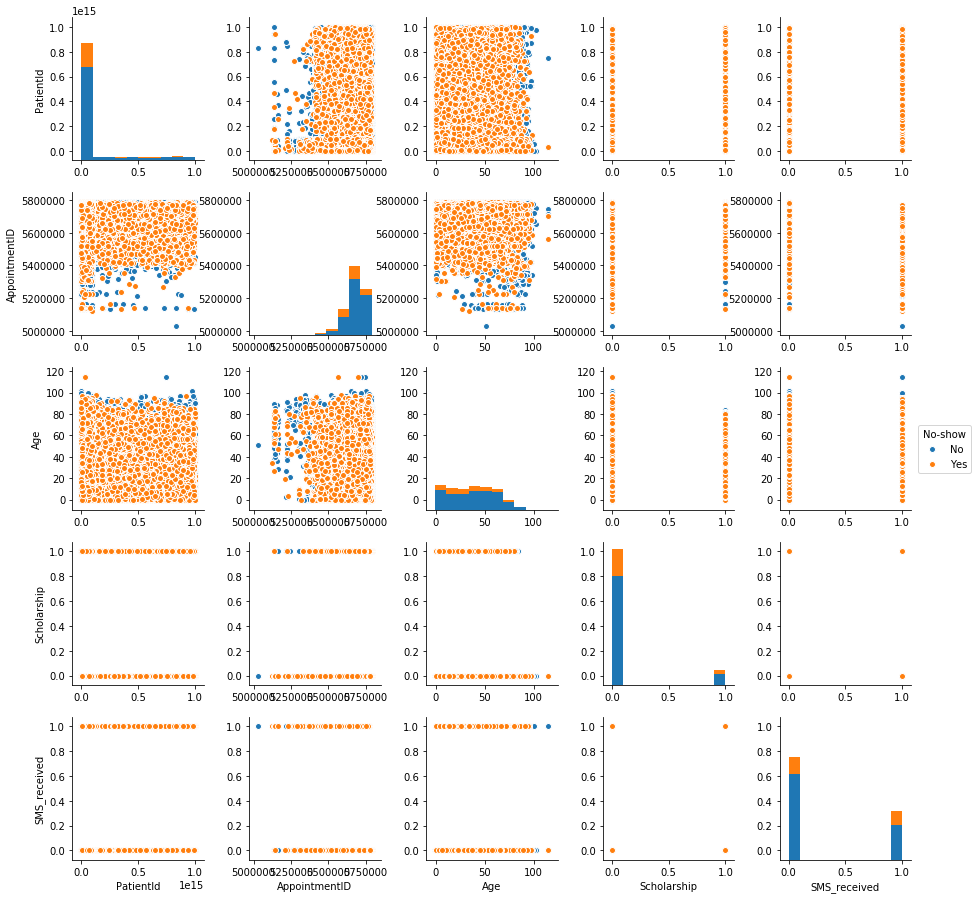

In [13]:
sb.pairplot(df, hue="No-show",)


Text(0.5,1,'Ratio between male,female  ')

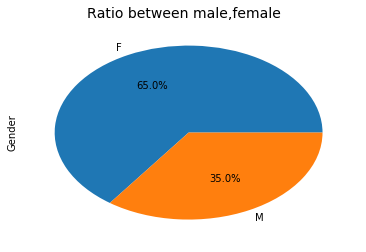

In [17]:
round(df['Gender'].value_counts()/df.shape[0]*100,2).plot.pie(autopct='%1.1f%%')
mp.pyplot.title('Ratio between male,female  ',fontsize=14)


### It is noted above:
#### The percentage of sick males, and the percentage of female patients as the orange color expresses the percentage of males and blue females

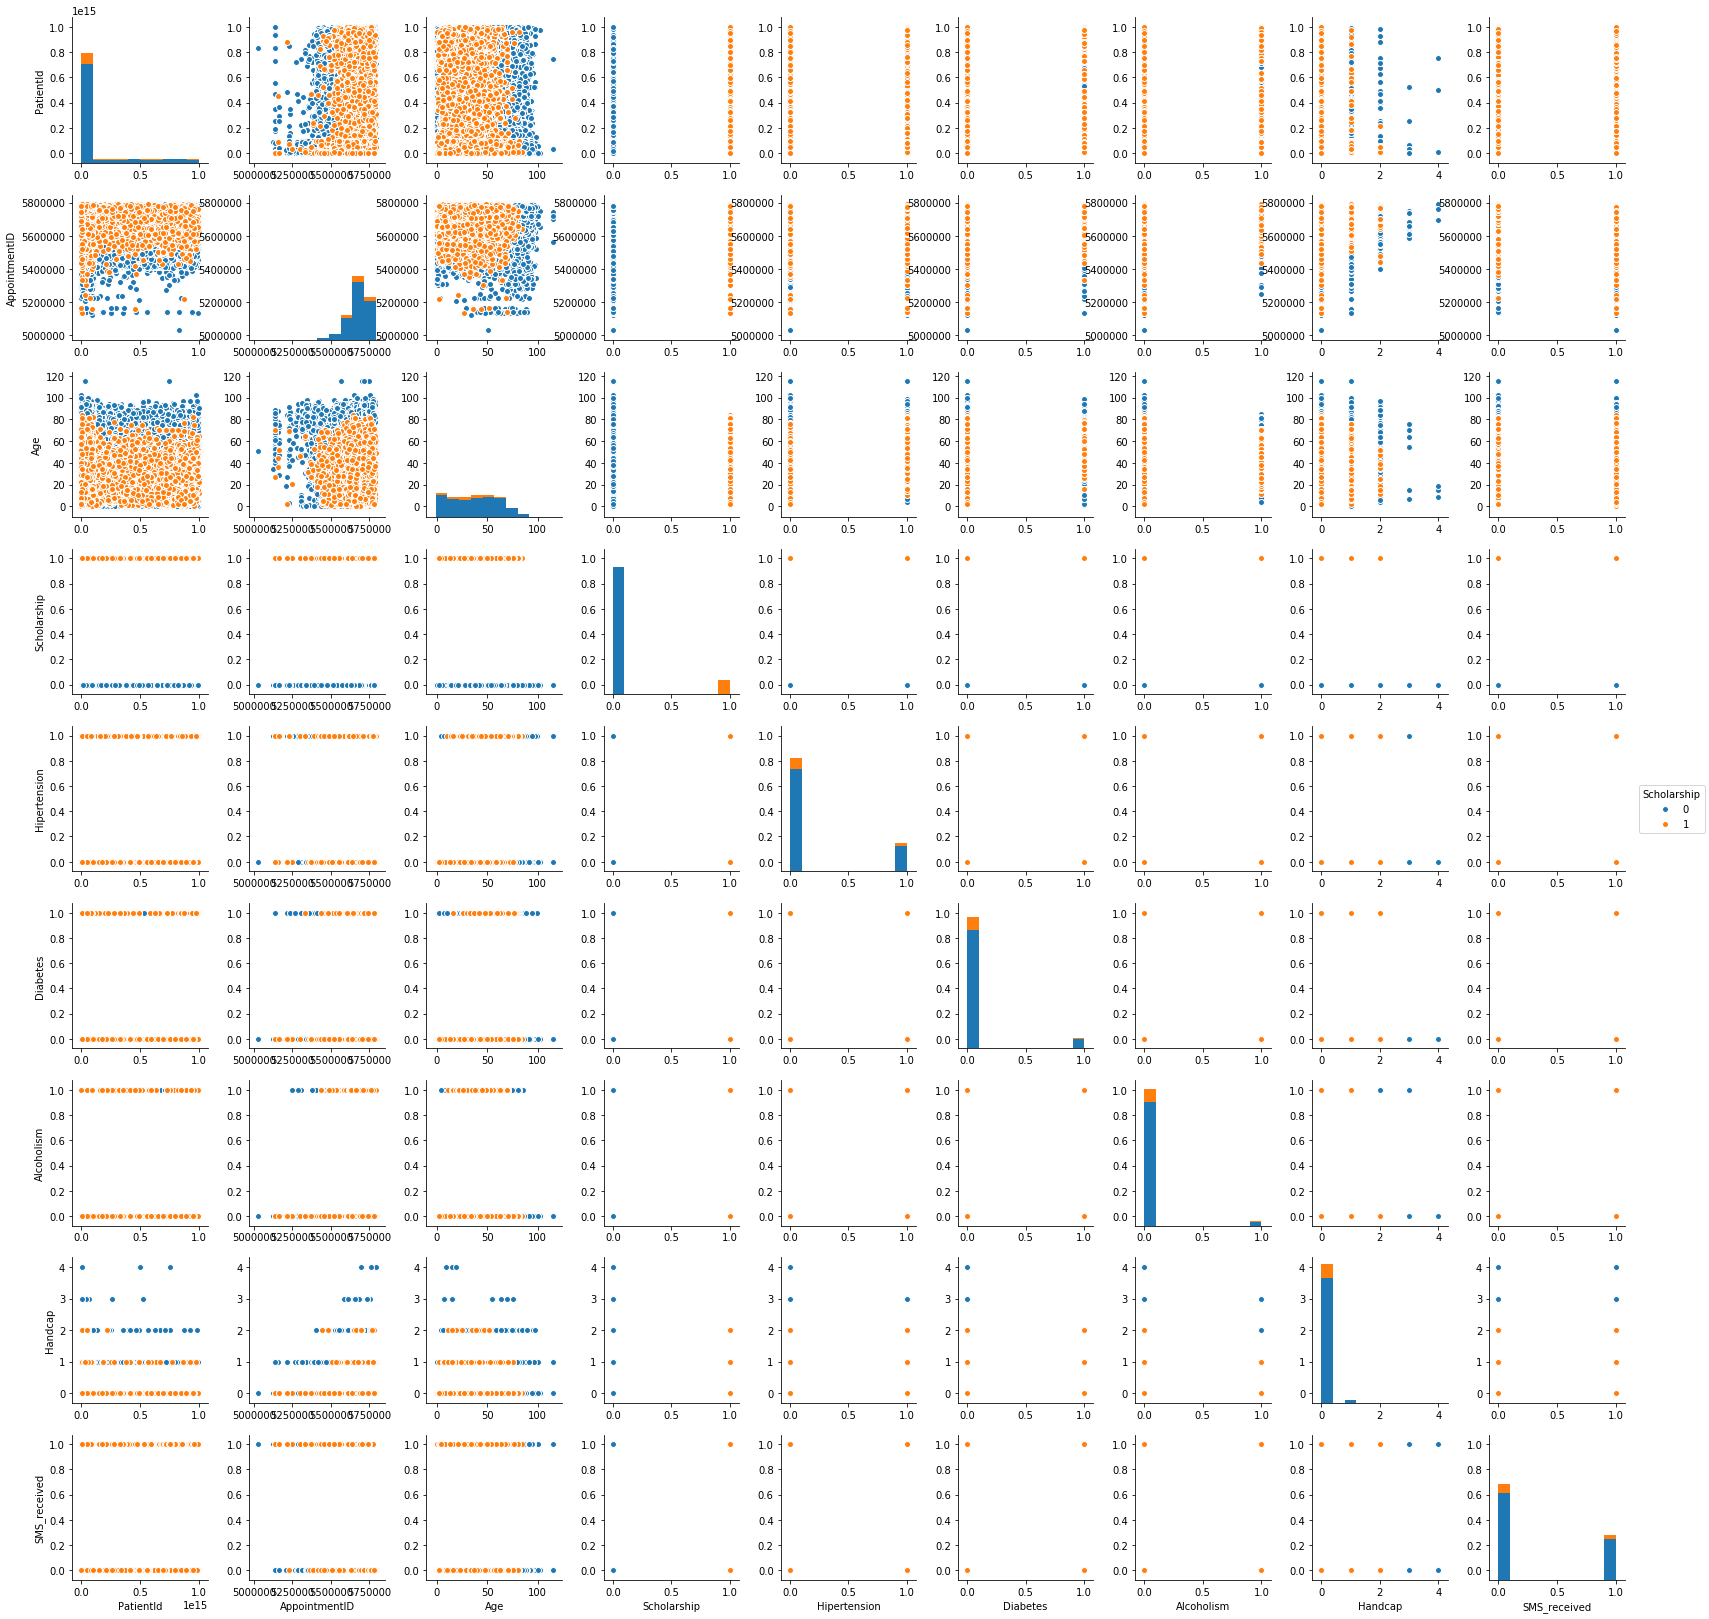

In [10]:
sns.pairplot(df,hue='Scholarship')


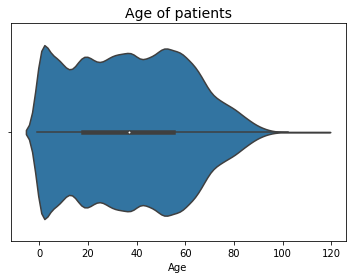

In [21]:
ags = sns.violinplot(x=df['Age']);
ags.set_title('Age of patients',fontsize=14);

### *Note

#### The no-show rate is greater than the no-show rate

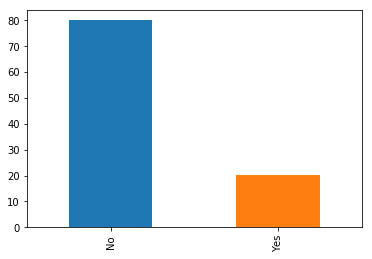

In [11]:
round(df['No-show'].value_counts()/df.shape[0]*100,2).plot.bar()

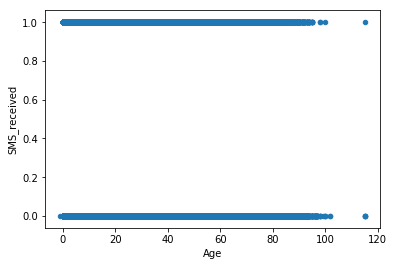

In [13]:
df[['Age', 'SMS_received']].plot.scatter(x ='Age', y='SMS_received')

### *Note
#### Looking at the numbers below, the following can be observed

#### The number of subscribers is less than the number of non-subscribers

In [15]:
df['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [20]:
pip install -U seaborn



The following command must be run outside of the IPython shell:

    $ pip install -U seaborn

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


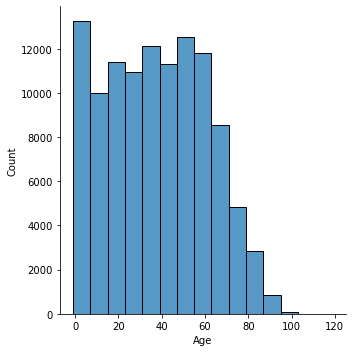

In [6]:
sns.displot(df, x="Age", binwidth=8)


> **Tip**:  When looking at the top of the graph, we find that patients aged 0 to 10 are more than 12000, which is the largest percentage,
While those aged from 90 to 100 have a lower percentage

Text(0.5,1,'count of handcap')

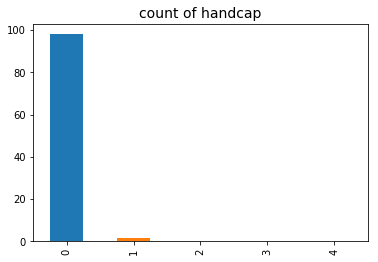

In [7]:
round(df['Handcap'].value_counts()/df.shape[0]*100,2).plot.bar()
mp.pyplot.title('count of handcap',fontsize=14)


In [14]:
pip install seaborn==0.9.0



The following command must be run outside of the IPython shell:

    $ pip install seaborn==0.9.0

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


Text(0.5,1,'Ratio between Age and Scholarship')

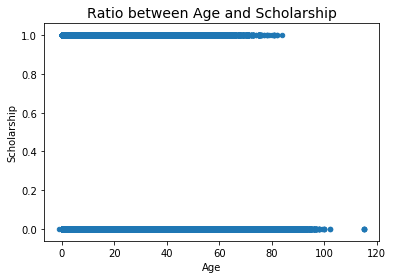

In [15]:
df[['Age', 'Scholarship']].plot.scatter(x ='Age', y='Scholarship')
mp.pyplot.title('Ratio between Age and Scholarship',fontsize=14)


In [31]:
pip install seaborn



The following command must be run outside of the IPython shell:

    $ pip install seaborn

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


<a id='Analytical questions'></a>

## Let's start answering some questions to get some insights
# Analytical questions

In [11]:
def Gnowshow(amount,total):
    return (amount / total) * 100
noshow = df['No-show'] == "Yes"
df2 = df[noshow]

In [12]:
df['Gender'].count()


22319

In [13]:
noshow_count = df2["Gender"].count()


In [15]:
males = df2['Gender'] == 'M'


In [17]:
male_count = df2[males]['Gender'].count()


In [18]:
print("Gender male count of no shows", male_count)


Gender male count of no shows 7725


In [20]:
females = df2['Gender'] == 'F'


In [21]:
female_count = df2[females]['Gender'].count()


In [22]:
print("Gender female count of no shows", female_count)


Gender female count of no shows 14594


In [25]:
print(Gnowshow(male_count,noshow_count))


34.6117657601


In [26]:
print(Gnowshow(female_count,noshow_count))


65.3882342399


In [ ]:
round(df['No-show'].value_counts()/df.shape[0]*100,2).plot.bar()

## We have caught Inight
> **Tip**: The number of females who did not attend is greater than the number of males, meaning that males are more present than females, which indicates that most patients who are treated are male, and this makes us provide everything necessary for male patients, and the question is why females do not attend like males?

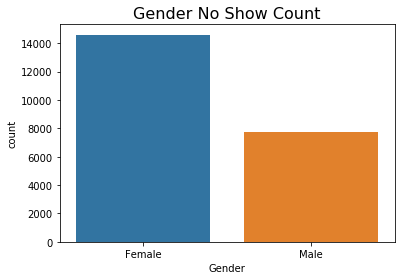

In [28]:
GNON = sns.countplot(df2.Gender.replace({'F':'Female','M':'Male'}));
GNON.set_title('Gender No Show Count',fontsize=14);

### is the ratio between Age and Scholarship?

In [13]:
df["Age"].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

Text(0.5,1,'Age ratio  of Scholarship')

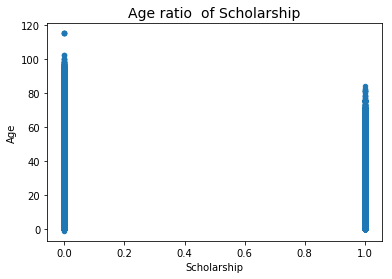

In [12]:
df[['Scholarship', 'Age']].plot.scatter(x ='Scholarship', y='Age')
mp.pyplot.title('Age ratio  of Scholarship',fontsize=14)


> **Tip**: Ages from 80 to 100 are all unshared and there are also some outlier in the data of non-subscribers 

### Is there a greater percentage of non-attendance among men or women?

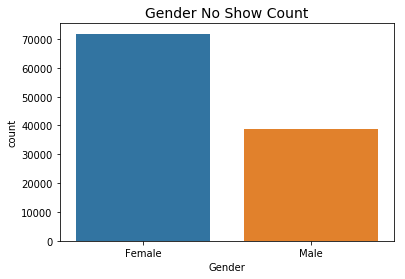

In [9]:
agg = sns.countplot(df.Gender.replace({'F':'Female','M':'Male'}));
agg.set_title('Gender No Show Count',fontsize=14);


In [79]:
X=df.drop(['ScheduledDay', 'PatientId','AppointmentID','AppointmentDay','No-show'], axis=1)
X.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0


In [80]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
X=X.values
X[:,0]=labelencoder.fit_transform(X[:,0])
X[:,2]=labelencoder.fit_transform(X[:,2])
X

array([[0, 62, 39, ..., 0, 0, 0],
       [1, 56, 39, ..., 0, 0, 0],
       [0, 62, 45, ..., 0, 0, 0],
       ..., 
       [0, 21, 43, ..., 0, 0, 1],
       [0, 38, 43, ..., 0, 0, 1],
       [0, 54, 43, ..., 0, 0, 1]], dtype=object)

In [84]:
df=pd.DataFrame(df)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,0,62,39,0,1,0,0,0,0,0
1,1,56,39,0,0,0,0,0,0,0
2,0,62,45,0,0,0,0,0,0,0
3,0,8,54,0,0,0,0,0,0,0
4,0,56,39,0,1,1,0,0,0,0


In [87]:
df=df.astype(int)


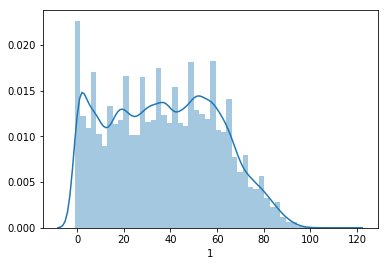

In [88]:
sns.distplot(df[1])


> **Tip**: We can see that most of the patients are of the age group 0-60.
 As the age increases the patients of that category are seen less.

### How many patients attended?
### How many patients not attended?

In [21]:
pip install matplotlib


The following command must be run outside of the IPython shell:

    $ pip install matplotlib

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [4]:
df["No-show"].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

### is the ratio between males or females and No show appointments?

In [5]:
df["Gender"].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

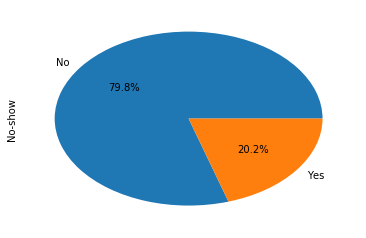

In [10]:
round(df['No-show'].value_counts()/df.shape[0]*100,2).plot.pie(autopct='%1.1f%%')

<a id='conclusions'></a>
## Conclusions


## Result :
> **Tip**: 1- no missing in this data. 
 2- The number of females who did not attend is greater than the number of males
 3- All ages are subject to Scholarship
 4- The number of Handcap is almost negligible
 5- You need to know why the number of females who booked and did not attend is so high, what makes them not attend?
 6- The number of females who booked is greater than the number of males, but the percentage of males who were harmed is greater    than the percentage of females.
   From the above we can predict that mostly the women who booked will not come

### Finally, I hope that I have been able to provide some insights that will serve your business, and hopefully, we will have another job in the future.


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])